## Principal Component Analysis

In [1]:
import numpy as np
import pandas_profiling as pp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#pp.ProfileReport(dataframe)

In [3]:
dataframe = pd.read_csv('CSVfile/CSVfile_sintesi/main_dataframe.csv', index_col=0)
data = pd.read_csv('CSVfile/CSVfile_sintesi/Clean_data/clean_dataframe.csv', index_col=0)
data

,"('T', 'xacc', 'mean')","('T', 'xacc', 'std')","('T', 'xacc', 'min')","('T', 'xacc', '25%')","('T', 'xacc', '50%')","('T', 'xacc', '75%')","('T', 'xacc', 'max')","('T', 'yacc', 'mean')","('T', 'yacc', 'std')","('T', 'yacc', 'min')",...,"('LL', 'ymag', '50%')","('LL', 'ymag', '75%')","('LL', 'ymag', 'max')","('LL', 'zmag', 'mean')","('LL', 'zmag', 'std')","('LL', 'zmag', 'min')","('LL', 'zmag', '25%')","('LL', 'zmag', '50%')","('LL', 'zmag', '75%')","('LL', 'zmag', 'max')"
0,9.359757,0.293035,7.9657,9.2363,9.3679,9.5178,10.6150,1.027443,0.603110,-0.78544,...,-0.034141,-0.027868,-0.014492,0.251273,0.006244,0.235590,0.246950,0.252920,0.255730,0.26254
1,9.455824,0.806650,8.0414,8.9040,9.3383,9.8339,12.5100,-0.587637,1.423511,-3.18580,...,0.172620,0.325530,0.464830,0.451550,0.167177,-0.040247,0.370050,0.473460,0.588790,0.66169
2,9.413740,0.390297,8.5235,9.1655,9.3158,9.6536,10.5040,0.704964,0.925802,-1.86660,...,-0.173930,-0.146740,0.026178,0.199156,0.152890,-0.238900,0.106270,0.242670,0.311820,0.45890
3,9.491654,0.207121,8.7278,9.3690,9.5035,9.6005,10.3680,-0.210449,0.211567,-0.97454,...,-0.385510,-0.351600,-0.197670,0.701586,0.041030,0.602320,0.679340,0.702410,0.730940,0.77657
4,9.520442,0.133295,9.1067,9.4562,9.5262,9.5912,9.9332,-0.994991,0.241968,-1.82350,...,0.075147,0.227920,0.337960,0.462670,0.067394,0.334190,0.409420,0.443240,0.513870,0.59323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,9.160420,2.681516,3.9391,6.7850,9.5246,11.2690,14.0790,0.730624,1.403434,-2.76460,...,0.366860,0.452930,0.506230,0.055666,0.061902,-0.076343,-0.002128,0.068123,0.110170,0.15306
9116,9.339332,2.622927,3.2902,6.9888,9.8595,11.2480,15.3320,0.691049,1.341564,-1.77400,...,0.325550,0.389660,0.456140,0.013131,0.069190,-0.116450,-0.057969,0.020197,0.081878,0.12244
9117,9.187042,2.756884,3.7657,6.7729,9.3943,11.0700,15.0760,0.495131,1.458675,-2.95120,...,0.365200,0.446950,0.511730,0.041460,0.060306,-0.077492,-0.014530,0.048946,0.094196,0.15939
9118,9.278632,2.817662,3.6010,6.6485,9.6776,11.4010,15.1750,0.959334,1.287001,-1.71060,...,0.317810,0.390050,0.442860,0.017258,0.066386,-0.089226,-0.054698,0.030437,0.082306,0.11026


In [4]:
#
# Scaling dei dati
#

scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
print(data_scaled)
print(f'mean of scaled features {np.mean(data_scaled,0)}')
print(f'st.dev. of scaled features {np.std(data_scaled,0)}')

[[ 4.24180202e-01 -6.29606834e-01  7.75934189e-01 ...  5.30430798e-01
   4.16533472e-01  2.57804573e-01]
 [ 4.49744838e-01 -4.79982795e-01  7.89397838e-01 ...  1.15964622e+00
   1.35488043e+00  1.36603141e+00]
 [ 4.38545780e-01 -6.01272857e-01  8.75141896e-01 ...  5.01186860e-01
   5.74558694e-01  8.02991652e-01]
 ...
 [ 3.78218612e-01  8.81502808e-02  2.89417754e-02 ... -5.15207114e-02
  -3.85645203e-02 -2.85880078e-02]
 [ 4.02591918e-01  1.05855769e-01 -3.50998540e-04 ... -1.04328130e-01
  -7.20628249e-02 -1.64995836e-01]
 [ 4.15778087e-01  5.63043338e-02 -7.66687234e-02 ... -1.71469589e-02
   1.13420370e-02 -1.98945302e-03]]
mean of scaled features [-6.85611412e-17 -2.96059473e-17 -2.80477396e-17  1.93217761e-16
  3.52154952e-16  1.10632751e-16  1.24656620e-17  7.47939722e-17
  8.10268032e-17 -9.50506730e-17 -4.98626481e-17  1.86984930e-17
  0.00000000e+00  4.05134016e-17 -8.41432187e-17  8.72596342e-17
  6.23283102e-18 -1.24656620e-17  1.02841712e-16  3.11641551e-17
  5.29790636e-1

[0.28254002 0.1188405  0.08864182 0.06901587 0.04301675 0.03823368
 0.02883358 0.02418135 0.02048075 0.01863329 0.01754084 0.01542716
 0.0134294  0.01216232 0.01077848 0.00991898 0.0089201  0.00758525
 0.00728735 0.00676688 0.00651579 0.0063622  0.00621068 0.00557478
 0.00544012 0.00512783 0.00481144 0.0045083  0.00425867 0.0040381 ]
0.2825400247481636


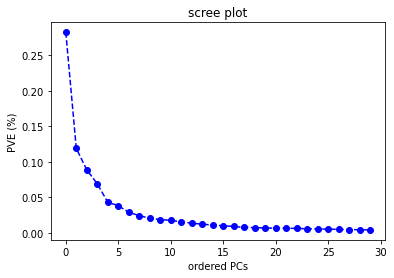

In [5]:
#
# Riduzione del numero di feature a 30
#

pca_model = PCA(n_components=30)
pca_coordinates = pca_model.fit_transform(data_scaled)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:1]))

<Figure size 432x288 with 0 Axes>

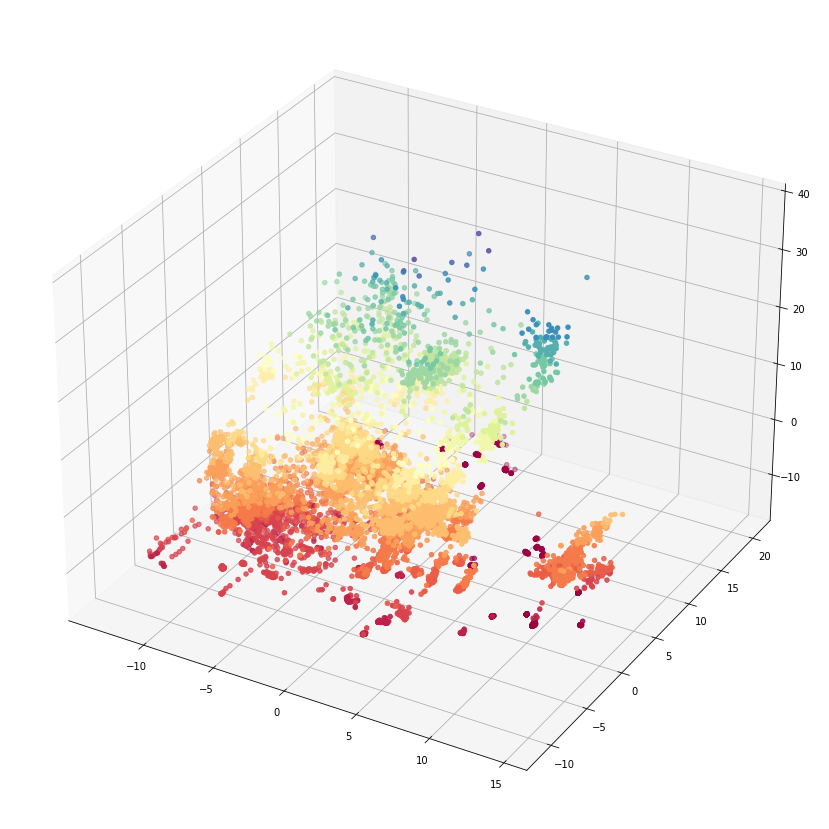

In [6]:
fig = plt.figure()
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

#
# Data for three-dimensional scattered points
#

zdata = pca_coordinates[:, 0]
xdata = pca_coordinates[:, 1]
ydata = pca_coordinates[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.cm.get_cmap('Spectral',19));

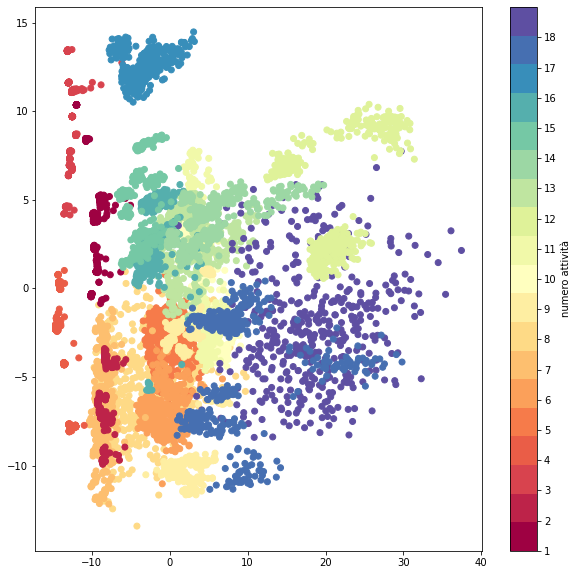

In [7]:
#
# Di seguito gli scatter plot di primi cinque componenti riportati dalla PCA 
#

plt.figure(figsize=(10,10))
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=dataframe["('a', '', '')"].to_numpy(), cmap=plt.cm.get_cmap('Spectral',19))
plt.colorbar(ticks=range(19), label='numero attività')

#
# (1,2)
#

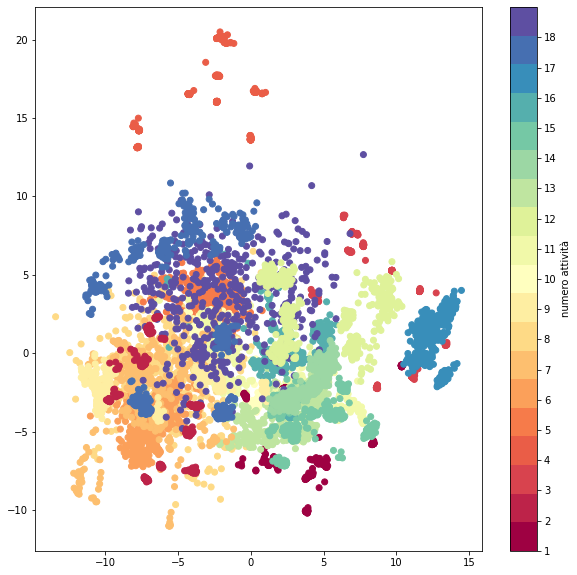

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(pca_coordinates[:, 1], pca_coordinates[:, 2], c=dataframe["('a', '', '')"].to_numpy(), cmap=plt.cm.get_cmap('Spectral',19))
plt.colorbar(ticks=range(19), label='numero attività')

#
# (2,3)
#

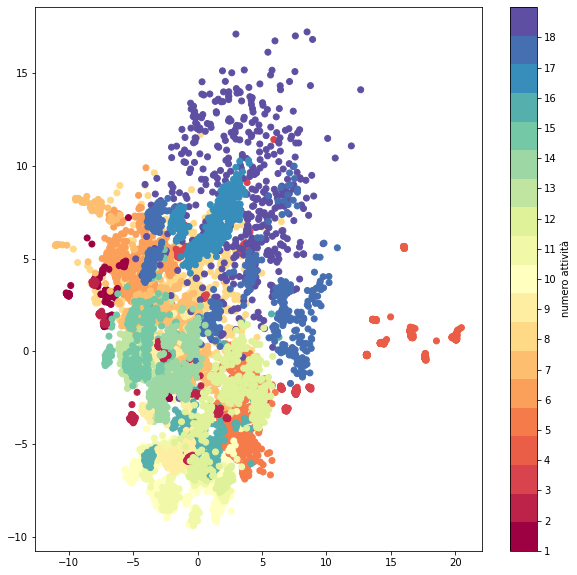

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(pca_coordinates[:, 2], pca_coordinates[:, 3], c=dataframe["('a', '', '')"].to_numpy(), cmap=plt.cm.get_cmap('Spectral',19))
plt.colorbar(ticks=range(19), label='numero attività')

#
# (3,4)
#

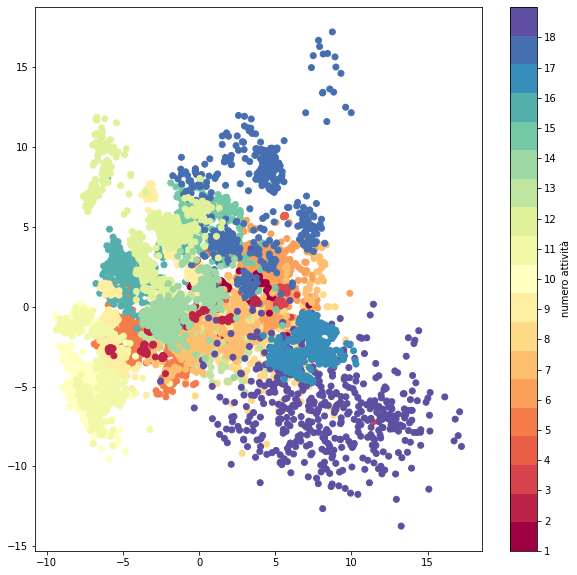

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(pca_coordinates[:, 3], pca_coordinates[:, 4], c=dataframe["('a', '', '')"].to_numpy(), cmap=plt.cm.get_cmap('Spectral',19))
plt.colorbar(ticks=range(19), label='numero attività')

#
# (4,5)
#

In [11]:
print(pca_model.components_)

[[ 0.04431561  0.08058281 -0.04624624 ...  0.00671896  0.01474189
   0.02565952]
 [-0.04071858  0.00591485 -0.03633339 ...  0.00658657  0.00377258
   0.00122788]
 [-0.08128305  0.0257432  -0.07695    ... -0.15082464 -0.14860386
  -0.14337699]
 ...
 [-0.01140073  0.03082152 -0.01416272 ...  0.03039994  0.04625044
   0.05239461]
 [-0.02216989  0.01744192 -0.06341152 ... -0.00421164 -0.02247797
  -0.03250672]
 [ 0.01413709  0.00040922  0.01660144 ...  0.06762733  0.07575651
   0.0667146 ]]


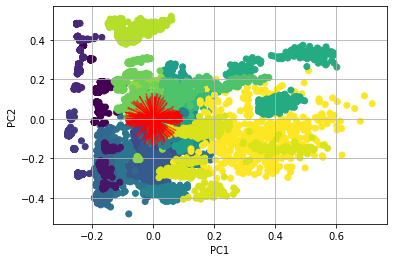

In [12]:
y = dataframe["('a', '', '')"]

score = pca_coordinates[:,0:2]
coeff = np.transpose(pca_model.components_[0:2, :])
labels = list(data.columns)

xs = score[:,0]
ys = score[:,1]
n = coeff.shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

#
# Biplot -- all arrows
#

plt.scatter(xs * scalex, ys * scaley, c = y)
for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

[8, 238]
{'PC0': "('T', 'yacc', 'std')", 'PC1': "('RL', 'ymag', 'mean')"}


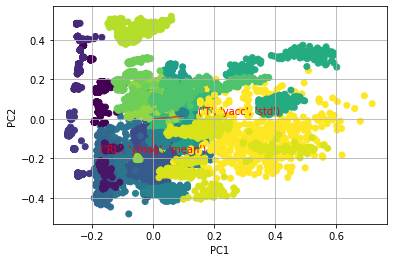

In [13]:
#
# Get the index of the most important features on first 2 PCA components
#

most_important = [np.abs(pca_model.components_[i]).argmax() for i in range(2)]
print(most_important)

feature_names = data.columns
most_important_names = [feature_names[most_important[i]] for i in range(2)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(2)}
print(dic)

# Biplot -- only most important features per axis
plt.scatter(xs * scalex, ys * scaley, c = y)

plt.arrow(0, 0, coeff[8,0], coeff[8,1],color = 'r',alpha = 0.5)
plt.text(coeff[8,0]* 3, coeff[8,1] * 3, labels[8], color = 'r', ha = 'center', va = 'center')

plt.arrow(0, 0, coeff[238,0], coeff[238,1],color = 'r',alpha = 0.5)
plt.text(coeff[238,0]* 1.15, coeff[238,1] * 1.15, labels[238], color = 'r', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

plt.show()